In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
fashion_mnist=keras.datasets.fashion_mnist

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [ ]:
X_train_full.shape

(60000, 28, 28)

In [ ]:
import numpy as np

In [ ]:
X_train_full_1 = np.zeros((60000,784))
X_train_full_1 = np.array(X_train_full)

In [ ]:
X_train_full[1].shape

(28, 28)

In [ ]:
nsamples,nx,ny = X_train_full.shape
X_train_2d=np.reshape(X_train_full,(nsamples,nx*ny))
nsamples,nx,ny = X_test.shape
X_test_2d=np.reshape(X_test,(nsamples,nx*ny))

In [ ]:
X_train_2d.shape

(60000, 784)

In [ ]:
X_test_2d.shape

(10000, 784)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_2d)
X_train_scaled = scaler.transform(X_train_2d)
X_test_scaled = scaler.transform(X_test_2d)

In [ ]:
from sklearn.decomposition import PCA
pca= PCA(.98)
pca.fit(X_train_scaled)
print(pca.n_components_)

X_train_pca = pca.transform(X_train_scaled)

X_test_pca = pca.transform(X_test_scaled)

420


In [ ]:
X_train_pca.shape

(60000, 420)

In [ ]:
from sklearn.cluster import KMeans
k = 10
kmeans = KMeans(n_clusters=k)
X_digits_dist = kmeans.fit_transform(X_train_pca)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train_pca[representative_digit_idx]

In [ ]:
X_representative_digits.shape

(10, 420)

In [ ]:
X_digits_dist

array([[30.2323639 , 36.94070847, 40.08381833, ..., 20.97143065,
        33.42248053, 35.92758527],
       [37.27414955, 30.84744382, 21.04184482, ..., 41.79349261,
        42.17939597, 43.67776634],
       [31.86721387, 14.84030936, 27.58332576, ..., 30.18878636,
        41.02951628, 23.89605532],
       ...,
       [36.52257105, 28.31186515, 22.39832018, ..., 39.16041478,
        43.29507054, 38.48410949],
       [30.56362452, 13.64237533, 28.60194848, ..., 29.74684444,
        37.7109868 , 23.3083394 ],
       [34.8857628 , 24.51110792, 40.21199413, ..., 28.52481874,
        41.65077706, 19.38020128]])

In [ ]:
representative_digit_idx

array([19280, 42736, 37392,  9065, 28572, 59961, 15996,  5548,  2766,
        7605])

In [ ]:
X_representative_digits.shape

(10, 420)

In [ ]:
X_representative_digits=list(X_representative_digits)
X_representative_digits

In [ ]:
labels = len(np.unique(y_train_full))
print(labels)
label_names = {0:'T-shirt/top', 1:'Trouser',2: 'Pullover',3: 'Dress',4: 'Coat',5:
               'Sandal',6: 'Shirt', 7:'Sneaker',8:  'Bag',9: 'Ankle boot'}

10


In [ ]:
kmeans_cluster_labels =kmeans.labels_

num_cluster_labels = len(np.unique(kmeans_cluster_labels))
#assigning indexes into respective cluster members
cluster_indexes = [[] for i in range(labels)]
#print(cluster_indexes)
for i,label in enumerate(kmeans_cluster_labels):
    for n in range(num_cluster_labels):
        if label == n:
            cluster_indexes[n].append(i)
        else:
            continue
#number of datapoints in individual clusters
print('With PCA')
for i in range(num_cluster_labels):
    print('No. of items in Cluster ' + str(i) + ': ' + str(len(cluster_indexes[i])))


With PCA
No. of items in Cluster 0: 2488
No. of items in Cluster 1: 4657
No. of items in Cluster 2: 7701
No. of items in Cluster 3: 9100
No. of items in Cluster 4: 9275
No. of items in Cluster 5: 6719
No. of items in Cluster 6: 2289
No. of items in Cluster 7: 2351
No. of items in Cluster 8: 8000
No. of items in Cluster 9: 7420


In [ ]:
len(X_representative_digits)

784

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_representative_digits, y_train_full)
log_reg.score(X_test_2d, y_test)

ValueError: ignored

In [ ]:
X_train_full_1.shape

In [ ]:
X_valid, X_train = X_train_full_1[:5000] / 255., X_train_full_1[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255

In [ ]:
X_valid.shape


In [ ]:
X_train[0,0]

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[1], cmap="binary")
plt.axis('off')
plt.show()

In [ ]:
X_new_valid = X_valid.drop(['label'],axis=1).to_numpy()

In [ ]:
nsamples, nx, ny = X_train_full.shape
X_new_valid=[]
for i in range(nsamples):
  X_new_valid.append(X_train_full[i].reshape(nx*ny))
#X_new_valid = X_valid.reshape((nsamples,nx*ny)) 
#nsamples, nx, ny = X_test.shape
#X_new_test = X_test.reshape((nsamples,nx*ny))

In [ ]:
nsamples, nx, ny = X_test.shape
X_new_test=[]
for i in range(nsamples):
  X_new_test.append(X_test[i].reshape(nx*ny))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_new_valid)
X_train_scaled = scaler.transform(X_new_valid)
X_test_scaled = scaler.transform(X_new_valid)

In [ ]:
from sklearn.decomposition import PCA
pca= PCA(.98)
pca.fit(X_train_scaled)
print(pca.n_components_)

X_train_pca = pca.transform(X_train_scaled)

X_test_pca = pca.transform(X_test_scaled)

420


In [ ]:
from sklearn.cluster import KMeans
k = 10
kmeans = KMeans(n_clusters=k)
X_digits_dist = kmeans.fit_transform(X_train_scaled)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train_pca[representative_digit_idx]

In [ ]:
X_final=[]
for i in X_representative_digits:
  X_final.append(i.reshape(28,28))

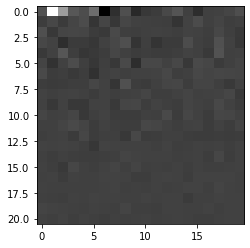

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(X_final[1], cmap="binary")

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_representative_digits, y_train_full)
log_reg.score(X_new_test, y_test)

ValueError: ignored

In [ ]:
X_new_valid.shape

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
k = 50
kmeans = KMeans(n_clusters=k)
X_digits_dist = kmeans.fit_transform(X_new_valid)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_representative_digits, y_train)
log_reg.score(X_new_test, y_test)

In [ ]:
#Finding the optimal number of clusters
a=[]
for i in range(2,10):
  kmeans=KMeans(n_clusters=i,random_state=51).fit(X_new_valid)
  a.append(kmeans.inertia_)
plt.plot(a)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
 ("kmeans", KMeans(n_clusters=4, random_state=42)),
 ("log_reg", LogisticRegression( max_iter=5000, random_state=42,penalty='l2')),
])
pipeline.fit(X_new_valid, y_valid)

In [ ]:
pipeline.score(X_new_test, y_test)
